In [1]:
import os
import certifi
os.environ['SSL_CERT_FILE'] = certifi.where()
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [2]:
model="deepseek-r1-distill-llama-70b"
from langchain_groq import ChatGroq
llm=ChatGroq(model=model)
llm.invoke("hi")
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [3]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [4]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage ,AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from typing import TypedDict, Annotated, Sequence



## Design a simple Workflow without tool calling 

In [5]:
def call_model(state: MessagesState):
    messages = state['messages']
    responce = llm.invoke(messages)
    return {"messages":[responce]}

In [6]:
state = {"messages":["hi hello how are you?"]}

In [7]:
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 9, 'total_tokens': 47, 'completion_time': 0.183930615, 'prompt_time': 0.009835372, 'queue_time': 0.049612708, 'total_time': 0.193765987}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--77a7960e-f58e-4e1d-b7aa-ee0cfc842088-0', usage_metadata={'input_tokens': 9, 'output_tokens': 38, 'total_tokens': 47})]}

In [8]:
# from langchain_core.messages import AnyMessage
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]


In [9]:
workflow = StateGraph(MessagesState)

In [10]:
workflow.add_node("my_bot",call_model)

In [11]:
workflow.add_edge(START,"my_bot")


In [12]:
workflow.add_edge("my_bot",END)

In [13]:
app  = workflow.compile()

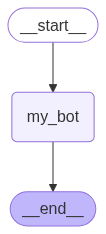

In [14]:
from IPython.display import Image ,display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
input={"messages":["hi hello how are you?"]}


In [16]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='36ab1de8-b5f9-4ad0-a081-07192a26bf14'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.203055139, 'prompt_time': 0.010065348, 'queue_time': 0.049320309, 'total_time': 0.213120487}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d19a67b0-4c83-4129-ae29-de129e8922f1-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}

In [17]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from my_bot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.195889378, 'prompt_time': 0.009901691, 'queue_time': 0.049328979, 'total_time': 0.205791069}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a53c65dd-85d0-4f57-920a-d563d6f3267f-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




## Design a simple Workflow without tool calling 

In [18]:
@tool
def search(query:str):
    """this is my custom for seaching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degtrress and sunny "
    return " the temp is 25 degress cloudy"

In [19]:
search.invoke("what is s temparature in kashmir?")

' the temp is 25 degress cloudy'

In [20]:
search.invoke("what is s temparature in delhi?")

'the temp is 45 degtrress and sunny '

In [21]:
search

StructuredTool(name='search', description='this is my custom for seaching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000021235484A60>)

In [22]:
llm.invoke("what  is a weather in delhi?")

AIMessage(content="<think>\nOkay, so I need to figure out the weather in Delhi. I'm not exactly sure how to start, but I know Delhi is a city in India. I think India has a monsoon climate, but I'm not entirely certain. Maybe I should break this down by seasons.\n\nFirst, I remember that India has a monsoon season, which usually brings a lot of rain. So, I think Delhi probably experiences that too. But when exactly is the monsoon in Delhi? I think it's around July to September, but I'm not 100% sure. I should probably confirm that.\n\nThen, there are the other seasons. I think India has a winter, summer, and monsoon season. So, in Delhi, the summer must be really hot. I've heard that summers in Delhi can be quite harsh. Maybe the temperatures go up to 40 degrees Celsius or more. That's really hot. When does summer start and end? Probably around March to June.\n\nWinter would be the cooler season. I imagine it's not too cold, but maybe it can get chilly, especially in the mornings and ev

## Binding a tool to the llm


In [23]:
tools = [search]

In [24]:
llm_with_tool = llm.bind_tools(tools)

In [25]:
responce = llm_with_tool.invoke("what is a weather is delhi?")

In [26]:
responce

AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking about the weather in Delhi. They might be planning a trip or just curious. I should use the search tool to find the current weather conditions. I\'ll call the search function with "delhi weather" as the query. That should give me the latest info to share with the user.\n', 'tool_calls': [{'id': '5j8ktsrg8', 'function': {'arguments': '{"query":"delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 133, 'total_tokens': 222, 'completion_time': 0.407846706, 'prompt_time': 0.112214251, 'queue_time': 5.696236305, 'total_time': 0.520060957}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f77a5f22-8cb9-4037-bcdc-ad49cee6084a-0', tool_calls=[{'name': 'search', 'args': {'query': 'delhi weather'}, 'id

In [27]:
responce.content

''

In [28]:
responce.tool_calls

[{'name': 'search',
  'args': {'query': 'delhi weather'},
  'id': '5j8ktsrg8',
  'type': 'tool_call'}]

In [29]:
def call_model(state:MessagesState):
    question = state["messages"]
    responce = llm_with_tool.invoke(question)
    return {"messages":[responce]}


In [30]:
input = {"messages":["what is the weather is delhi"]}

In [31]:
responce = call_model(input)

In [32]:
responce["messages"][-1].content

''

In [33]:
responce["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'z2watpjs4',
  'type': 'tool_call'}]

## Router function for orchestration 

now whatever will come from call_model router funtion will redirect this to the appropriate tool


In [34]:
from langgraph.prebuilt import ToolNode

In [35]:
def router_function(state:MessagesState):
    message = state['messages']
    last